<a href="https://colab.research.google.com/github/VictorHerbert/MachineLearning/blob/master/Notebooks/Logistic_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

# Visualization

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/VictorHerbert/MachineLearning/master/datasets/iris.csv')

#df['species'] = df['species'].apply(lambda x : df['species'].unique().tolist().index(x))
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Correlations

In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Individual Correlations

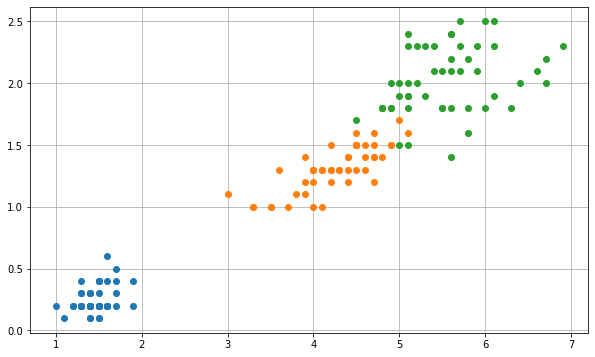

In [156]:
for specie in df['species'].unique():
  dt = df[df['species'] == specie]
  plt.plot(dt['petal_length'],dt['petal_width'],'o')


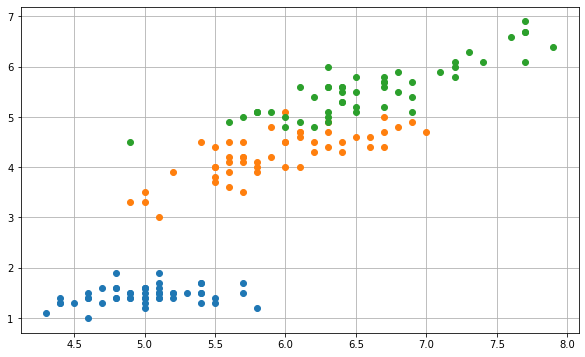

In [147]:
for specie in df['species'].unique():
  dt = df[df['species'] == specie]
  plt.plot(dt['sepal_length'],dt['petal_length'],'o')

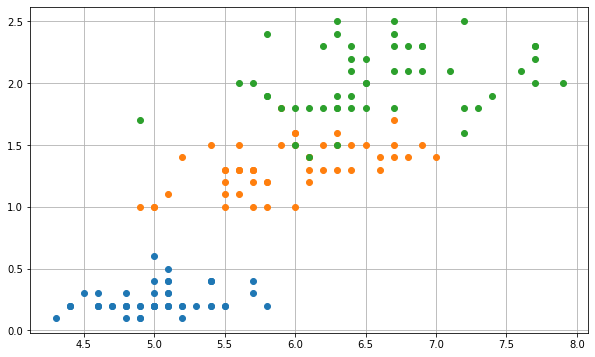

In [157]:
for specie in df['species'].unique():
  dt = df[df['species'] == specie]
  plt.plot(dt['sepal_length'],dt['petal_width'],'o')

# Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## Preparing the data

In [0]:
x = df[list(df)[:-1]]
y = df[['species']]

x_scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = x_scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25)

## Training

In [0]:
model = LogisticRegression()
model.fit(x_train,np.ravel(y_train))

y_pred = model.predict(x_test)

# Metrics

In [86]:
from sklearn import metrics

print('Train Score:\t', model.score(x_train,y_train))
print('Test Score:\t', model.score(x_test,y_test))

Train Score:	 0.9285714285714286
Test Score:	 0.8947368421052632


## Confusion Table

['Blues', 'BuGn', 'BuPu', 'Greens', 'Greys', 'OrRd', 'Oranges']


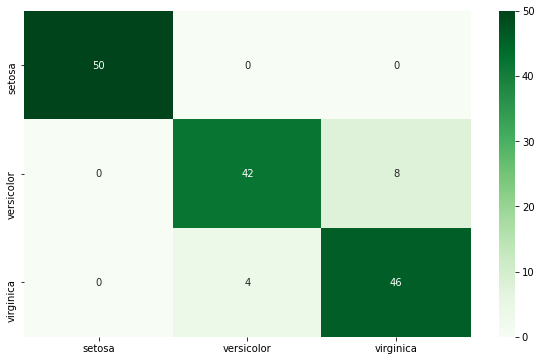

In [146]:
import seaborn as sn

predict = model.predict(x_scaled)

cm = metrics.confusion_matrix(y, predict)

df_cm = pd.DataFrame(cm, index = [i for i in df.species.unique()],
                  columns = [i for i in df.species.unique()])

print([plt.colormaps()[i] for i in [2,6,8,16,18,20,22] ])

sn.heatmap(df_cm, annot=True,cmap=plt.colormaps()[g[3]])